In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  str    
 1   availability  13320 non-null  str    
 2   location      13319 non-null  str    
 3   size          13304 non-null  str    
 4   society       7818 non-null   str    
 5   total_sqft    13320 non-null  str    
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), str(6)
memory usage: 936.7 KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df['location'] = df['location'].fillna("unknown")

In [7]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [8]:
df.drop(columns=['society'], inplace=True)

In [9]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
def extract_bhk(x):
    try:
        return int(x.split()[0])
    except:
        return None

df['bhk'] = df['size'].apply(extract_bhk)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [11]:
df[['size','bhk']].head(10)


,size,bhk
0,2 BHK,2.0
1,4 Bedroom,4.0
2,3 BHK,3.0
3,3 BHK,3.0
4,2 BHK,2.0
5,2 BHK,2.0
6,4 BHK,4.0
7,4 BHK,4.0
8,3 BHK,3.0
9,6 Bedroom,6.0


In [12]:
df['bhk'].isnull().sum()

np.int64(16)

In [13]:
df = df[df['bhk'].notnull()]

In [14]:
df.drop(columns=['size'], inplace=True)

In [15]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0


In [16]:
df['bhk'].value_counts().sort_index()

bhk
1.0      656
2.0     5528
3.0     4857
4.0     1417
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
12.0       1
13.0       1
14.0       1
16.0       1
18.0       1
19.0       1
27.0       1
43.0       1
Name: count, dtype: int64

In [17]:
df[df['bath'] > df['bhk'] + 2][['bhk','bath']]

,bhk,bath
1078,9.0,14.0
1953,8.0,12.0
1979,8.0,12.0
2620,6.0,9.0
6838,5.0,8.0
6937,9.0,12.0
7709,4.0,7.0
8106,8.0,12.0
9974,3.0,6.0
9990,6.0,9.0


In [18]:
df = df[df['bath'] <= df['bhk'] + 2]

In [19]:
df[['bhk','bath']].describe()

,bhk,bath
count,13231.000000,13231.000000
mean,2.797597,2.683924
std,1.288063,1.315762
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,2.000000
75%,3.000000,3.000000
max,43.000000,40.000000


In [20]:
df.head(20)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2.0
5,Super built-up Area,Ready To Move,Whitefield,1170,2.0,1.0,38.00,2.0
6,Super built-up Area,18-May,Old Airport Road,2732,4.0,2.0,204.00,4.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,3300,4.0,2.0,600.00,4.0
8,Super built-up Area,Ready To Move,Marathahalli,1310,3.0,1.0,63.25,3.0
9,Plot Area,Ready To Move,Gandhi Bazar,1020,6.0,2.0,370.00,6.0


In [21]:
def convert_sqft(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

In [22]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0


In [23]:
df = df[df['total_sqft'].notnull()]

In [24]:
df['total_sqft'].dtype

dtype('float64')

In [25]:
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [26]:
import numpy as np

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    
    for location, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        
        reduced_df = subdf[
            (subdf.price_per_sqft > (mean - std)) &
            (subdf.price_per_sqft <= (mean + std))
        ]
        
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
        
    return df_out


In [27]:
df = remove_pps_outliers(df)


In [28]:
df.shape

(10057, 9)

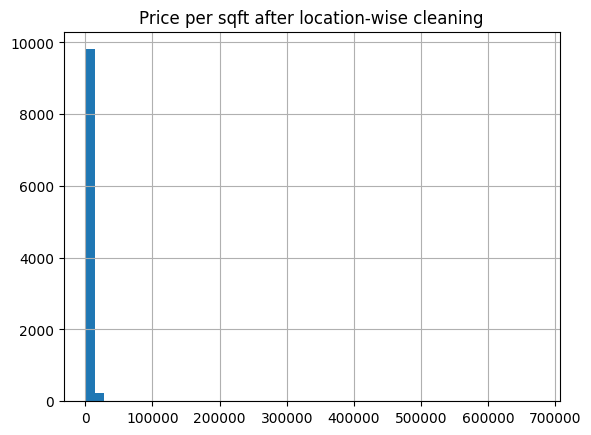

In [29]:
plt.figure()
df['price_per_sqft'].hist(bins=50)
plt.title("Price per sqft after location-wise cleaning")
plt.show()

In [30]:
import numpy as np
import pandas as pd

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            
            # compare with previous BHK only if enough data points exist
            if stats and stats['count'] > 5:
                bad_rows = bhk_df[bhk_df.price_per_sqft < stats['mean']]
                exclude_indices = np.append(exclude_indices, bad_rows.index.values)
    
    return df.drop(exclude_indices, axis='index')

In [31]:
df = remove_bhk_outliers(df)

In [32]:
df.shape

(8160, 9)

In [33]:
df['location'].value_counts()


location
Whitefield                        291
Sarjapur  Road                    255
Electronic City                   162
Raja Rajeshwari Nagar             140
Uttarahalli                       127
                                 ... 
Whitefield,                         1
Yarandahalli                        1
Yeshwanthpur Industrial Suburb      1
frazertown                          1
manyata park                        1
Name: count, Length: 806, dtype: int64

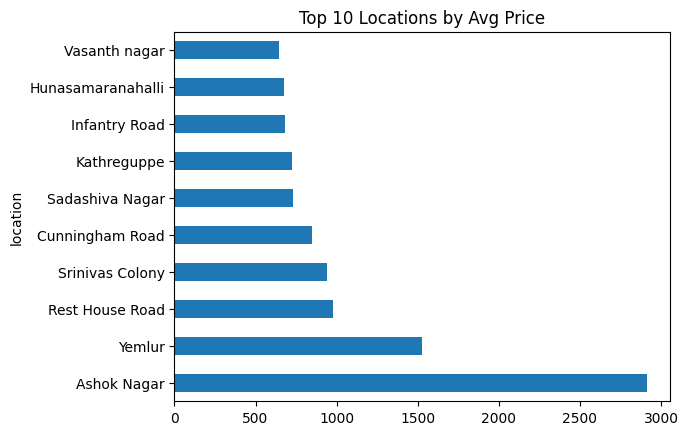

In [34]:
top = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

top.plot(kind='barh')
plt.title("Top 10 Locations by Avg Price")
plt.show()

In [35]:
location_stats = df['location'].value_counts()
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [36]:
df['location'] = df['location'].apply(
    lambda x: 'other' if x in location_stats_less_than_10 else x
)

In [37]:
df['location'].value_counts()

location
other                    2027
Whitefield                291
Sarjapur  Road            255
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
Kaikondrahalli             11
Kodigehaali                11
Somasundara Palya          11
Sultan Palaya              11
Vasanthapura               11
Name: count, Length: 179, dtype: int64

In [38]:
df[df['location'] == 'other'].head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,other,1672.0,3.0,2.0,150.0,3.0,8971.291866
1,Built-up Area,Ready To Move,other,1750.0,3.0,3.0,149.0,3.0,8514.285714
2,Super built-up Area,Ready To Move,other,1750.0,3.0,2.0,150.0,3.0,8571.428571
16,Built-up Area,Ready To Move,other,550.0,1.0,1.0,27.0,1.0,4909.090909
17,Super built-up Area,Ready To Move,other,1450.0,2.0,2.0,70.0,3.0,4827.586207


In [39]:
dummies = pd.get_dummies(df['location'])
df = pd.concat([df.drop('location', axis='columns'), dummies], axis='columns')

In [40]:
df.drop('other', axis='columns', inplace=True)

In [41]:
df.head()

,area_type,availability,total_sqft,bath,balcony,price,bhk,price_per_sqft,Devarachikkanahalli,1st Phase JP Nagar,...,Uttarahalli,Varthur,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Super built-up Area,Ready To Move,1672.0,3.0,2.0,150.0,3.0,8971.291866,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Built-up Area,Ready To Move,1750.0,3.0,3.0,149.0,3.0,8514.285714,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Super built-up Area,Ready To Move,1750.0,3.0,2.0,150.0,3.0,8571.428571,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,Ready To Move,1250.0,2.0,2.0,40.0,2.0,3200.000000,True,False,...,False,False,False,False,False,False,False,False,False,False
5,Plot Area,Ready To Move,1200.0,2.0,2.0,83.0,2.0,6916.666667,True,False,...,False,False,False,False,False,False,False,False,False,False


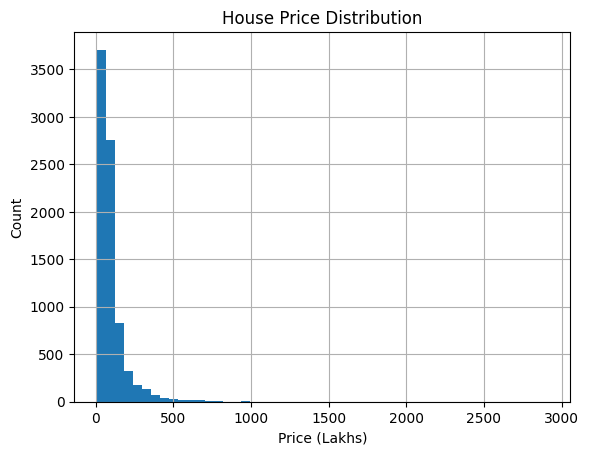

In [42]:
plt.figure()
df['price'].hist(bins=50)
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.title("House Price Distribution")
plt.show()


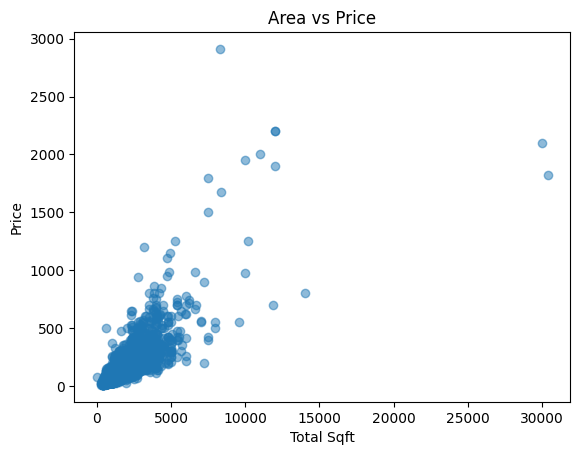

In [43]:
plt.figure()
plt.scatter(df['total_sqft'], df['price'], alpha=0.5)
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()


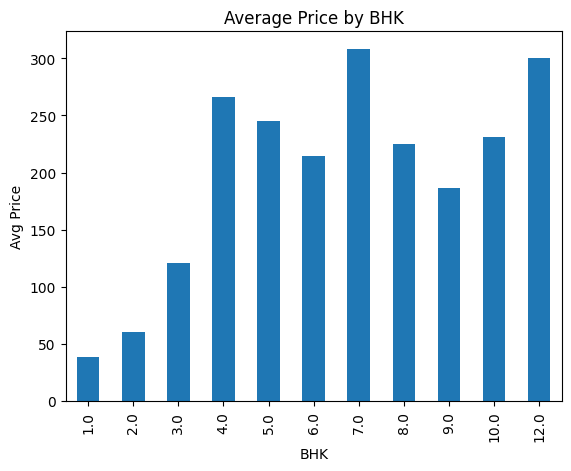

In [44]:
df.groupby('bhk')['price'].mean().plot(kind='bar')
plt.xlabel("BHK")
plt.ylabel("Avg Price")
plt.title("Average Price by BHK")
plt.show()


In [45]:
df.drop(columns=['area_type', 'availability'], inplace=True)

In [46]:
df.dtypes

total_sqft            float64
bath                  float64
balcony               float64
price                 float64
bhk                   float64
                       ...   
Vittasandra              bool
Whitefield               bool
Yelahanka                bool
Yelahanka New Town       bool
Yeshwanthpur             bool
Length: 184, dtype: object

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis='columns')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_score

0.7722601713225001

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf.score(X_test, y_test)


0.9824926012511049

In [50]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# input shape: (None, number_of_features)
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]

onnx_model = convert_sklearn(lr, initial_types=initial_type)
# agar RF use kar rahe ho to lr ki jagah rf

with open("bangalore_house.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())


In [51]:
import onnxruntime as rt
import numpy as np

sess = rt.InferenceSession("bangalore_house.onnx")

input_name = sess.get_inputs()[0].name

sample = X_test.iloc[:1].values.astype(np.float32)

pred = sess.run(None, {input_name: sample})
pred


[array([[76.573166]], dtype=float32)]

In [52]:
def predict_price(features):

    arr = np.array(features, dtype=np.float32).reshape(1, -1)

    pred = sess.run(None, {input_name: arr})

    return float(pred[0].ravel()[0])


In [53]:
sample = X_test.iloc[0].values
predict_price(sample)


76.57316589355469

In [54]:
import json

model_columns = X.columns.tolist()

with open("columns.json", "w") as f:
    json.dump(model_columns, f)


with open("columns.json","r") as f:
    columns = json.load(f)

def predict_from_input(sqft, bath, bhk, location):

    x = np.zeros(len(columns))

    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if location in columns:
        loc_index = columns.index(location)
        x[loc_index] = 1

    return predict_price(x)


predict_from_input(1200,2,2,"Whitefield")


80.63800048828125

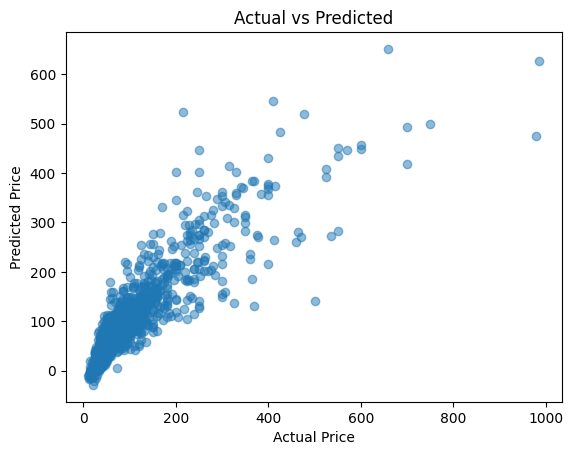

In [55]:
y_pred = lr.predict(X_test)

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()


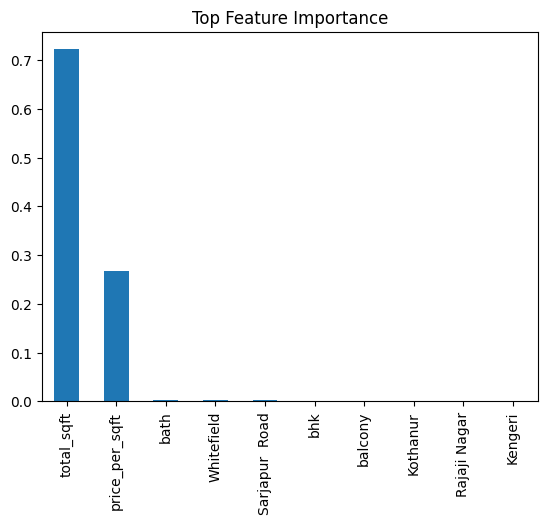

In [ ]:
importances = rf.feature_importances_

feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(10)
feat_imp.plot(kind='bar')
plt.title("Top Feature Importance")
plt.show()